In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [123]:
data = pd.read_csv('/home/jatinn/Downloads/Nifty50.csv',header=0, index_col=0, parse_dates=True, na_values=-99.99)
data.head()

,Close,Date.1,Close.1
Date,,,
2019-11-11 15:30:00,11913.45,11/11/2019 15:30:00,2778.65
2019-11-13 15:30:00,11840.45,11/13/2019 15:30:00,2736.15
2019-11-14 15:30:00,11872.10,11/14/2019 15:30:00,2728.85
2019-11-15 15:30:00,11895.45,11/15/2019 15:30:00,2715.25
2019-11-18 15:30:00,11884.50,11/18/2019 15:30:00,2720.20


In [124]:
columns=['Close', 'Close.1']
data = data[columns]
data.head()

,Close,Close.1
Date,,
2019-11-11 15:30:00,11913.45,2778.65
2019-11-13 15:30:00,11840.45,2736.15
2019-11-14 15:30:00,11872.10,2728.85
2019-11-15 15:30:00,11895.45,2715.25
2019-11-18 15:30:00,11884.50,2720.20


In [125]:
data.columns =['Largecaps', 'Smallcaps']
data.head()

,Largecaps,Smallcaps
Date,,
2019-11-11 15:30:00,11913.45,2778.65
2019-11-13 15:30:00,11840.45,2736.15
2019-11-14 15:30:00,11872.10,2728.85
2019-11-15 15:30:00,11895.45,2715.25
2019-11-18 15:30:00,11884.50,2720.20


<AxesSubplot:xlabel='Date'>

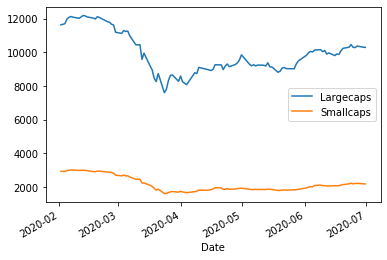

In [146]:
data["2020-02":"2020-06"].plot.line()

##Computing dropdown

"""
1. Compute the Wealth Index
2. Compute the Previous Peaks 
3. Compute the Drawdown

"""

In [128]:
data.index = pd.to_datetime(data.index,format = "%Y%m")
data.head()

,Largecaps,Smallcaps
Date,,
2019-11-11 15:30:00,11913.45,2778.65
2019-11-13 15:30:00,11840.45,2736.15
2019-11-14 15:30:00,11872.10,2728.85
2019-11-15 15:30:00,11895.45,2715.25
2019-11-18 15:30:00,11884.50,2720.20


In [171]:
def drawdown (data: pd.Series):
    wealth_index = 1000*(1+data)
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
      "Wealth":wealth_index,
      "Peaks":previous_peaks,
      "Drowdown":drawdown
    })

### Largecaps

<AxesSubplot:xlabel='Date'>

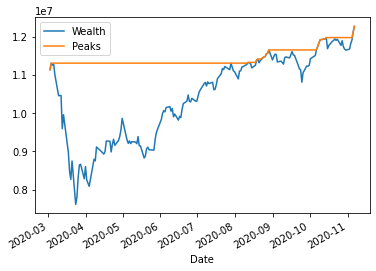

In [179]:
drawdown(data["2020-03":"2020-11"]["Largecaps"])[["Wealth","Peaks"]].plot()

### SmallCaps

<AxesSubplot:xlabel='Date'>

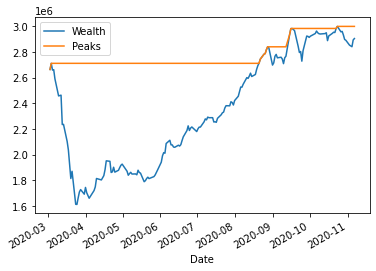

In [178]:
drawdown(data["2020-03":"2020-11"]["Smallcaps"])[["Wealth","Peaks"]].plot()